# **Importing libraries**

In [2]:
!pip install neuralprophet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from neuralprophet import NeuralProphet

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


# **Data Processing**

In [4]:
df = pd.read_csv('Rabat weather.csv')
df.head()

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2018-01-01 00:00:00,12.5,11.6,94.0,NaN,130.0,5.4,1034.3
1,2018-01-01 01:00:00,12.0,11.1,94.0,NaN,140.0,5.4,1034.0
2,2018-01-01 02:00:00,12.0,11.1,94.0,NaN,140.0,5.4,1033.0
3,2018-01-01 03:00:00,11.8,10.9,94.0,NaN,150.0,7.6,1033.8
4,2018-01-01 04:00:00,12.0,11.1,94.0,NaN,150.0,7.6,1032.0


In [6]:
df.dtypes

,0
time,object
temp,float64
dwpt,float64
rhum,float64
prcp,float64
wdir,float64
wspd,float64
pres,float64


In [12]:
#converting the time column into a datetime type
df['time'] = pd.to_datetime(df['time'], format='mixed')
df.dtypes

,0
time,datetime64[ns]
temp,float64
dwpt,float64
rhum,float64
prcp,float64
wdir,float64
wspd,float64
pres,float64


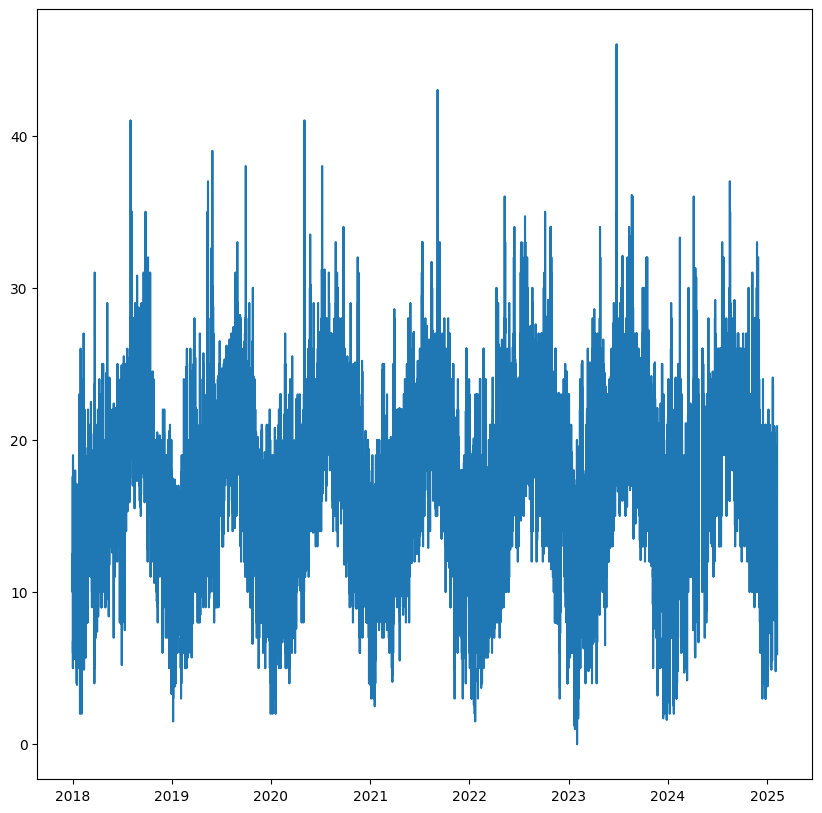

In [19]:
plt.figure(figsize=(10,10))
plt.plot(df['time'], df['temp'])
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62248 entries, 0 to 62247
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    62248 non-null  datetime64[ns]
 1   temp    61960 non-null  float64       
 2   dwpt    61960 non-null  float64       
 3   rhum    61960 non-null  float64       
 4   prcp    23129 non-null  float64       
 5   wdir    61645 non-null  float64       
 6   wspd    61960 non-null  float64       
 7   pres    61952 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.8 MB


In [23]:
data = df[['time', 'temp']]
#deleting all the missing values from the temp column
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data.head()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipython-input-23-2880106226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,2018-01-01 00:00:00,12.5
1,2018-01-01 01:00:00,12.0
2,2018-01-01 02:00:00,12.0
3,2018-01-01 03:00:00,11.8
4,2018-01-01 04:00:00,12.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61960 entries, 0 to 62247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      61960 non-null  datetime64[ns]
 1   y       61960 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


# **Training The Model**

In [26]:
model = NeuralProphet()
model.fit(data, freq='H', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

  aux_ts = pd.DataFrame(pd.date

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (243) is too small than the required number                     for the learning rate finder (269). The results might not be optimal.


Finding best initial lr:   0%|          | 0/269 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 256. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.352415,0.0,14.705117,17.955721,0.351389,0.0,0
1,0.093703,0.0,6.812366,8.363423,0.093544,0.0,1
2,0.039553,0.0,4.012372,5.118986,0.039453,0.0,2
3,0.020198,0.0,2.695043,3.495193,0.020165,0.0,3
4,0.016539,0.0,2.360758,3.060309,0.016487,0.0,4
...,...,...,...,...,...,...,...
995,0.013726,0.0,2.069621,2.710247,0.013720,0.0,995
996,0.013730,0.0,2.079957,2.722527,0.013915,0.0,996
997,0.013733,0.0,2.076674,2.715242,0.013771,0.0,997
998,0.013737,0.0,2.073172,2.713697,0.013750,0.0,998


RMSE = 2.7, which means the model is off by almost 3 degrees

# Forecasting

In [35]:
future = model.make_future_dataframe(data, periods=3803)
forecast = model.predict(future)
forecast.tail()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.997% of the data.
INFO:NP.df_utils:Major frequency h corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-p

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly,season_daily
3798,2025-07-14 22:00:00,None,21.880520,18.475163,4.923439,0.012071,-1.530152
3799,2025-07-14 23:00:00,None,21.396780,18.475185,4.925877,0.011183,-2.015465
3800,2025-07-15 00:00:00,None,20.925556,18.475210,4.928295,0.009551,-2.487499
3801,2025-07-15 01:00:00,None,20.542500,18.475235,4.930721,0.007525,-2.870982
3802,2025-07-15 02:00:00,None,20.343056,18.475260,4.933236,0.004635,-3.070075


In [37]:
plot1 = model.plot(forecast)
plot1.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [38]:
plot2 = model.plot_components(forecast)
plot2.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.11/dist-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The be